In [3]:
cd C:\2017\Work\Python\Kaggle\WSDM\Dataset

C:\2017\Work\Python\Kaggle\WSDM\Dataset


Reading dataset WSDM

In [2]:
import pandas as pd

train_tran1 = pd.read_csv("train_lin_rand_xgb1.csv")
test_tran1 = pd.read_csv("test_lin_rand_xgb1.csv")

Cleaning dataset and feature engineering

In [4]:
import pandas as pd
train_tran_mem_user = pd.read_csv("train_tran_mem_user.csv")
test_tran_mem_user = pd.read_csv("test_tran_mem_user.csv")


train_tran1 = train_tran_mem_user.drop_duplicates(keep="first", subset = ["msno"])# dropped duplicated column from transaction
test_tran1 = test_tran_mem_user.drop_duplicates(keep="first", subset = ["msno"])
train_tran1.reset_index(inplace=False)
test_tran1.reset_index(inplace=False)

train_tran1['gender'] = train_tran1['gender'].map({'female': 2, 'male': 1})
test_tran1['gender'] = test_tran1['gender'].map({'female': 2, 'male': 1})

train_tran1 = train_tran1.fillna(0)
test_tran1 = test_tran1.fillna(0)

#train_tran1.loc[train_tran1['bd'] < 0, 'bd'] = 0
#train_tran1.loc[train_tran1['bd'] > 80, 'bd'] = 0

#test_tran1.loc[test_tran1['bd'] < 0, 'bd'] = 0
#test_tran1.loc[test_tran1['bd'] > 80, 'bd'] = 0


train_tran1["discount"]= [int(i) for i in (train_tran1["plan_list_price"] - train_tran1["actual_amount_paid"])]
train_tran1.loc[train_tran1['discount'] < 0, 'discount'] = 0
test_tran1["discount"]= [int(i) for i in (test_tran1["plan_list_price"] - test_tran1["actual_amount_paid"])]
test_tran1.loc[test_tran1['discount'] < 0, 'discount'] = 0

,index,Unnamed: 0,msno,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,...,registration_init_time,regis_time,date_count,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,0,0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0,41.0,30.0,99.0,99.0,1.0,20151018.0,...,20150718.0,2015-07-18,4.0,4.0,8.0,2.0,1.0,0.0,1.0,0.003333
1,1,4,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0,34.0,0.0,0.0,149.0,1.0,20150731.0,...,20051030.0,2005-10-30,784.0,784.0,17144.0,3408.0,2411.0,2534.0,37192.0,14.947500
2,2,8,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,0,41.0,30.0,99.0,99.0,1.0,20170315.0,...,20141101.0,2014-11-01,67.0,67.0,313.0,66.0,39.0,35.0,1223.0,0.331111
3,3,10,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,0,41.0,30.0,99.0,99.0,1.0,20170327.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,11,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,0,30.0,30.0,129.0,129.0,1.0,20170322.0,...,20161222.0,2016-12-22,16.0,16.0,12.0,7.0,4.0,3.0,368.0,0.105000
5,5,12,nu1jZ/flvSaXRg0U9Es+xmo2KlAXq/q+mhcWFStwm9w=,0,36.0,30.0,180.0,180.0,0.0,20170326.0,...,20160202.0,2016-02-02,389.0,389.0,2126.0,867.0,634.0,438.0,26821.0,7.288611
6,6,14,biDTtgK83fEWXJDaxzD1eh22dion/h3odeIbS7qJMmY=,0,37.0,30.0,149.0,149.0,1.0,20151205.0,...,20130306.0,2013-03-06,506.0,506.0,2756.0,770.0,405.0,431.0,12367.0,4.228611
7,7,18,k/8uwi/iM9LZmRAIWXLqpZY6ENomXAscwsQsh6PxcTw=,0,41.0,30.0,99.0,99.0,1.0,20170331.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,19,18rQ/746SjA6nBx325UsyhfsDhu4tK01FXFxHWZjw20=,0,40.0,30.0,149.0,149.0,1.0,20170308.0,...,20130611.0,2013-06-11,641.0,641.0,1135.0,281.0,173.0,218.0,26916.0,6.787500
9,9,21,2V13OCoWx6vqKr/ZzNmKFrmnC2FtR4SWMz5C5Hi02PY=,0,40.0,30.0,149.0,149.0,1.0,20170308.0,...,20160502.0,2016-05-02,76.0,76.0,56.0,8.0,12.0,10.0,1262.0,0.330278


In [ ]:
#Import libraries:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import model_selection, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search


In [9]:
#train_tran1 = train_tran1.drop(["Unnamed: 0"], axis = 1)
train_tran1.columns

Index(['msno', 'is_churn', 'payment_method_id', 'payment_plan_days',
       'plan_list_price', 'actual_amount_paid', 'is_auto_renew',
       'transaction_date', 'membership_expire_date', 'is_cancel',
       'transact_conv_date', 'transact_mem_exp_date', 'Membership_se_days',
       'city', 'bd', 'gender', 'registered_via', 'registration_init_time',
       'regis_time', 'date_count', 'num_25', 'num_50', 'num_75', 'num_985',
       'num_100', 'num_unq', 'total_secs'],
      dtype='object')

In [3]:
dummy_city = pd.get_dummies(train_tran1["city"], prefix="city")
train_tran1 = pd.concat([train_tran1, dummy_city], axis=1)

dummy_city1 = pd.get_dummies(test_tran1["city"], prefix="city")
test_tran1 = pd.concat([test_tran1, dummy_city1], axis=1)

dummy_regvia = pd.get_dummies(train_tran1["registered_via"], prefix="regv")
train_tran1 = pd.concat([train_tran1, dummy_regvia], axis=1)

dummy_regvia1 = pd.get_dummies(test_tran1["registered_via"], prefix="regv")
test_tran1 = pd.concat([test_tran1, dummy_regvia1], axis=1)

In [4]:
import numpy as np
train_tran1['is_discount'] = train_tran1.discount.apply(lambda x: 1 if x > 0 else 0)
test_tran1['is_discount'] = test_tran1.discount.apply(lambda x: 1 if x > 0 else 0)
test_tran1['autorenew_&_not_cancel'] = ((test_tran1.is_auto_renew == 1) == (test_tran1.is_cancel == 0)).astype(np.int8)
train_tran1['autorenew_&_not_cancel'] = ((train_tran1.is_auto_renew == 1) == (train_tran1.is_cancel == 0)).astype(np.int8)
train_tran1['notAutorenew_&_cancel'] = ((train_tran1.is_auto_renew == 0) == (train_tran1.is_cancel == 1)).astype(np.int8)
test_tran1['notAutorenew_&_cancel'] = ((test_tran1.is_auto_renew == 0) == (test_tran1.is_cancel == 1)).astype(np.int8)

In [5]:
def process_age(df,cut_points,label_names):
    df["bd"] = df["bd"].fillna(-0.5)
    df["bd_categories"] = pd.cut(df["bd"],cut_points,labels=label_names)
    return df

cut_points = [-4000,0,18,30,50,3000]
label_names = ["Missing","Child","Young","Adult","Older"]

train_tran1 = process_age(train_tran1,cut_points,label_names)
test_tran1 = process_age(test_tran1,cut_points,label_names)

dummy_bd = pd.get_dummies(train_tran1["bd_categories"], prefix="bdc")
train_tran1 = pd.concat([train_tran1, dummy_bd], axis=1)

dummy_bd = pd.get_dummies(test_tran1["bd_categories"], prefix="bdc")
test_tran1 = pd.concat([test_tran1, dummy_bd], axis=1)

In [6]:


dummy_bd = pd.get_dummies(train_tran1["payment_method_id"], prefix="pay")
train_tran1 = pd.concat([train_tran1, dummy_bd], axis=1)

dummy_bd = pd.get_dummies(test_tran1["payment_method_id"], prefix="pay")
test_tran1 = pd.concat([test_tran1, dummy_bd], axis=1)

In [14]:
train_tran1.loc[train_tran1['Membership_se_days'] < 0, 'Membership_se_days'] = 0


test_tran1.loc[test_tran1['Membership_se_days'] < 0, 'Membership_se_days'] = 0


 

In [16]:
Membership = train_tran1["Membership_se_days"]

Member = (train_tran1["Membership_se_days"] - Membership.mean())/Membership.std()

train_tran1["Member"] = Member
Membership = test_tran1["Membership_se_days"]

Member = (test_tran1["Membership_se_days"] - Membership.mean())/Membership.std()

test_tran1["Member"] = Member

In [ ]:
train_tran1['transact_mem_exp_date'] = pd.to_datetime(train_tran1['transact_mem_exp_date'])
train_tran1['transact_mem_exp_date'].head()
train_tran1.info()

In [45]:
train_tran1["registration_init_time"].describe()

count    9.709600e+05
mean     1.450531e+07
std      9.036429e+06
min      0.000000e+00
25%      0.000000e+00
50%      2.013021e+07
75%      2.015102e+07
max      2.017042e+07
Name: registration_init_time, dtype: float64

In [30]:
train2 = train_tran1[(train_tran1['transact_mem_exp_date'] > '2017-03-01') & (train_tran1['transact_mem_exp_date'] < '2017-04-01')]

In [7]:
predictors = [ 'pay_0.0', 'pay_3.0', 'pay_5.0', 'pay_6.0', 'pay_8.0', 'pay_10.0',
       'pay_11.0', 'pay_12.0', 'pay_13.0', 'pay_14.0', 'pay_15.0', 'pay_16.0',
       'pay_17.0', 'pay_18.0', 'pay_19.0', 'pay_20.0', 'pay_21.0', 'pay_22.0',
       'pay_23.0', 'pay_24.0', 'pay_25.0', 'pay_26.0', 'pay_27.0', 'pay_28.0',
       'pay_29.0', 'pay_30.0', 'pay_31.0', 'pay_32.0', 'pay_33.0', 'pay_34.0',
       'pay_35.0', 'pay_36.0', 'pay_37.0', 'pay_38.0', 'pay_39.0', 'pay_40.0',
       'pay_41.0', 'payment_plan_days', 'actual_amount_paid', 'bdc_Adult','bdc_Child',
              'bdc_Older','bdc_Young','gender','date_count', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq', 'total_secs',
 'discount', 'is_auto_renew','is_cancel','autorenew_&_not_cancel','notAutorenew_&_cancel','city_0.0', 'city_1.0', 'city_3.0', 'city_4.0', 'city_5.0', 'city_6.0', 'city_7.0', 'city_8.0', 'city_9.0', 'city_10.0',
 'city_11.0', 'city_12.0', 'city_13.0', 'city_14.0', 'city_15.0', 'city_16.0', 'city_17.0', 'city_18.0', 'city_19.0', 'city_20.0',
 'city_21.0', 'city_22.0', 'regv_0.0', 'regv_3.0', 'regv_4.0', 'regv_7.0', 'regv_9.0', 'regv_13.0']

In [32]:
predictors = ['payment_method_id', 'payment_plan_days', 'plan_list_price','actual_amount_paid', 'bdc_Adult','bdc_Child',
              'bdc_Older','bdc_Young','gender','registration_init_time','date_count', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq', 'total_secs',
 'discount', 'is_auto_renew','is_cancel','autorenew_&_not_cancel','notAutorenew_&_cancel','city_0.0', 'city_1.0', 'city_3.0', 'city_4.0', 'city_5.0', 'city_6.0', 'city_7.0', 'city_8.0', 'city_9.0', 'city_10.0',
 'city_11.0', 'city_12.0', 'city_13.0', 'city_14.0', 'city_15.0', 'city_16.0', 'city_17.0', 'city_18.0', 'city_19.0', 'city_20.0',
 'city_21.0', 'city_22.0', 'regv_0.0', 'regv_3.0', 'regv_4.0', 'regv_7.0', 'regv_9.0', 'regv_13.0']

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

columns = predictors

all_X = train_tran1[columns]
all_y = train_tran1["is_churn"]

lr = LogisticRegression()
selector = RFECV(lr,cv=3)
selector.fit(all_X,all_y)
optimized_columns = all_X.columns[selector.support_]

In [11]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [13]:
test_tran1.columns

Index(['Unnamed: 0', 'msno', 'is_churn', 'payment_method_id',
       'payment_plan_days', 'plan_list_price', 'actual_amount_paid',
       'is_auto_renew', 'transaction_date', 'membership_expire_date',
       'is_cancel', 'transact_conv_date', 'transact_mem_exp_date',
       'Membership_se_days', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'regis_time', 'date_count', 'num_25',
       'num_50', 'num_75', 'num_985', 'num_100', 'num_unq', 'total_secs',
       'discount', 'city_0.0', 'city_1.0', 'city_3.0', 'city_4.0', 'city_5.0',
       'city_6.0', 'city_7.0', 'city_8.0', 'city_9.0', 'city_10.0',
       'city_11.0', 'city_12.0', 'city_13.0', 'city_14.0', 'city_15.0',
       'city_16.0', 'city_17.0', 'city_18.0', 'city_19.0', 'city_20.0',
       'city_21.0', 'city_22.0', 'regv_0.0', 'regv_3.0', 'regv_4.0',
       'regv_7.0', 'regv_9.0', 'regv_13.0', 'is_discount',
       'autorenew_&_not_cancel', 'notAutorenew_&_cancel', 'bd_categories',
       'bdc_Adult', 'b

In [8]:
train_tran1.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970960 entries, 0 to 970959
Columns: 104 entries, Unnamed: 0 to pay_41.0
dtypes: category(1), float64(22), int64(4), int8(2), object(4), uint8(71)
memory usage: 298.2+ MB


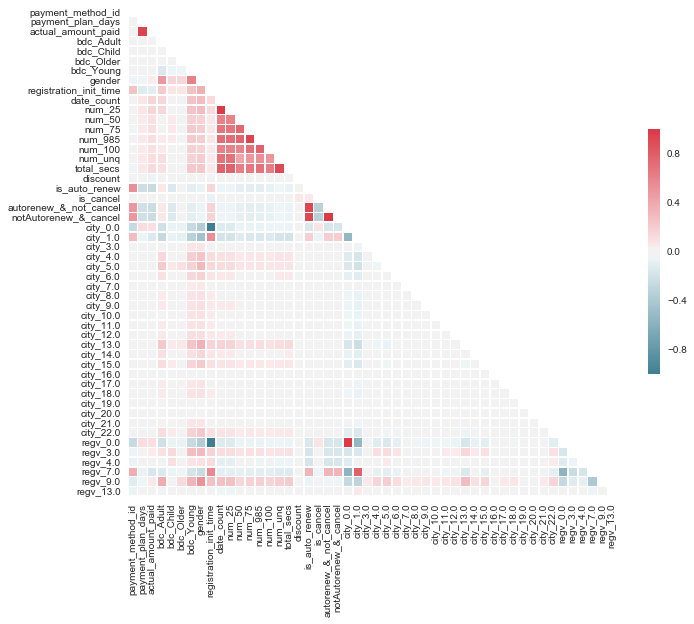

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_correlation_heatmap(df):
    corr = df.corr()
    
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()

columns = predictors

plot_correlation_heatmap(train_tran1[columns])

In [8]:
import sklearn.utils
train_random = sklearn.utils.shuffle(train_tran1)
#print('\n\ntrain_random: {0}'.format(train_random))
train_data = train_random.reset_index(drop=True)

In [9]:
train = train_data[1:600000]
test = train_data[600001:]

In [50]:
cols = predictors

train = train_data
test = test_tran1



import sys
import gc; gc.enable()
import collections
import xgboost as xgb
import pandas as pd
import numpy as np
import sklearn

In [51]:
def xgb_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'log_loss', sklearn.metrics.log_loss(labels, preds)

fold = 1
for i in range(fold):
    params = {
        'eta': 0.02, #use 0.002
        'max_depth': 6,
        'subsample': 0.5,
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'seed': i,
        'silent': True
    }
    x1, x2, y1, y2 = sklearn.model_selection.train_test_split(train[cols], train['is_churn'], test_size=0.3, random_state=i)
    watchlist = [(xgb.DMatrix(x1, y1), 'train'), (xgb.DMatrix(x2, y2), 'valid')]
    model = xgb.train(params, xgb.DMatrix(x1, y1), 2000,  watchlist, feval=xgb_score, maximize=False, verbose_eval=50, early_stopping_rounds=50) #use 1500
    if i != 0:
        pred += model.predict(xgb.DMatrix(test[cols]), ntree_limit=model.best_ntree_limit)
    else:
        pred = model.predict(xgb.DMatrix(test[cols]), ntree_limit=model.best_ntree_limit)
pred /= fold
test_predictions10 = pred.clip(0.0000001, 0.999999)

[0]	train-logloss:0.676058	valid-logloss:0.676062	train-log_loss:0.676058	valid-log_loss:0.676062
Multiple eval metrics have been passed: 'valid-log_loss' will be used for early stopping.

Will train until valid-log_loss hasn't improved in 50 rounds.
[50]	train-logloss:0.270119	valid-logloss:0.270218	train-log_loss:0.270119	valid-log_loss:0.270218
[100]	train-logloss:0.167066	valid-logloss:0.167177	train-log_loss:0.167066	valid-log_loss:0.167177
[150]	train-logloss:0.136422	valid-logloss:0.136539	train-log_loss:0.136422	valid-log_loss:0.136539
[200]	train-logloss:0.127206	valid-logloss:0.12743	train-log_loss:0.127206	valid-log_loss:0.12743
[250]	train-logloss:0.124278	valid-logloss:0.124627	train-log_loss:0.124278	valid-log_loss:0.124627
[300]	train-logloss:0.123206	valid-logloss:0.123725	train-log_loss:0.123206	valid-log_loss:0.123725
[350]	train-logloss:0.122559	valid-logloss:0.123266	train-log_loss:0.122559	valid-log_loss:0.123266
[400]	train-logloss:0.122161	valid-logloss:0.123081	

In [40]:
min(test_predictions1)

2.8799212028543519e-06

In [41]:
max(test_predictions1)

0.79020423311023757

In [ ]:
from sklearn.metrics import mean_squared_error
#train_mse = mean_squared_error(train_predictions, train['is_churn'])
test_mse = mean_squared_error(test_predictions, test['is_churn'])
import numpy as np
#train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
#print(train_rmse)
print(test_rmse)

KNN neighbor Classifier

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

train = train_data[1:10000]
all_X = train[predictors]
all_y = train['is_churn']
hyperparameters = {
    "n_neighbors": range(1,20,2),
    "weights": ["distance", "uniform"],
    "algorithm": ['brute'],
    "p": [1,2]
}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid=hyperparameters, cv=10)
grid.fit(all_X, all_y)

best_params = grid.best_params_
best_score = grid.best_score_


In [16]:
print(best_params)
print(best_score)

{'algorithm': 'brute', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
0.931693169317


In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='brute', n_neighbors = 7, p =  1, weights= 'distance')

knn.fit(train[predictors], train['is_churn'])
test_predictions11 = knn.predict(test[predictors])

In [42]:
submission = pd.DataFrame({
    "is_churn": test_predictions1,
        "msno": test_tran1["msno"]        
    })

submission.to_csv("sample_submission_new120.csv", index=False)

In [10]:
#test_predictionsx = pd.read_csv("sample_submission_new109.csv")
#test_predictionsx = test_predictionsx['is_churn']
#est_predictions2= test_predictions* 14
#est_predictions =(test_predictions2 + test_predictions1)/15
test_predictions =(test_predictionsx *25 + test_predictions11)/26

In [39]:
test_predictions1 = []
for r in test_predictions:
    if r < 0.5 and r > 0.04:
        r = r - 0.04
    elif r > 0.5:
        r = r - 0.08
    test_predictions1.append(r)
        
        

Linear regression model - first base model

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_tran1[predictors], train_tran1['is_churn'])
from sklearn.metrics import mean_squared_error
train_predictions1 = lr.predict(train_tran1[predictors])
train_predictions1 = train_predictions1.clip(0.0000001, 0.999999)
test_predictions1 = lr.predict(test_tran1[predictors])
test_predictions1 = test_predictions1.clip(0.0000001, 0.999999)

In [9]:
test_predictions11 = test_predictionsx * 0.3

In [81]:
train_pred = []

for i in train_tran1["rand_cls_predict"]:
    if i > 0.4:
        i=1
    else:
        i=0
    train_pred.append(i)
    
train_tran1["rand_cls_predict2"] = train_pred
test_pred = []

for i in test_tran1["rand_cls_predict"]:
    if i > 0.4:
        i=1
    else:
        i=0
    test_pred.append(i)
    
test_tran1["rand_cls_predict2"] = test_pred

Random forest classifier on wsdm data - Base model 2

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

clf = RandomForestClassifier(n_estimators=150, random_state=1, min_samples_leaf=2)

clf.fit(train_tran1[predictors], train_tran1["is_churn"])

#predictions = clf.predict_proba(train_tran1[predictors])[:,1]
predictions1 = clf.predict_proba(test_tran1[predictors])[:,1]
#print(roc_auc_score(train_tran1["is_churn"], predictions))

In [56]:
#train_tran1["rand_cls_predict"] = predictions
test_predictions = test_predictionsx["svm"]

In [52]:
train_tran1.pivot_table(index = "is_churn", values="log_response")

,log_response2
is_churn,
0,0.089868
1,0.090784


In [28]:
train_tran1.to_csv("train_lin_rand_xgb1.csv", index=False)
test_tran1.to_csv("test_lin_rand_xgb1.csv", index=False)

Meta-Logistic regression model with base linear, random, xgboost models

In [24]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(class_weight = 'balanced')
logistic_model.fit(train_data[predictors], train_data["is_churn"])
#train_predictions = logistic_model.predict_proba(train[predictors])[:,1]
test_predictions13 = logistic_model.predict_proba(test_tran1[predictors])[:,1]

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_predict, KFold

lr = LogisticRegression(class_weight = 'balanced')
kf = KFold(train.shape[0], random_state = 1)

predictions = cross_val_predict(lr, train[predictors], train['is_churn'], cv=kf)

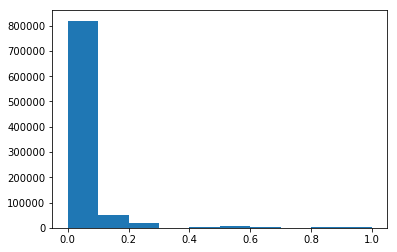

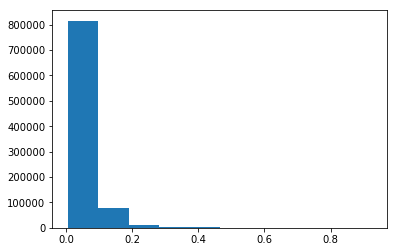

In [60]:
import matplotlib.pyplot as plt
plt.hist(test_predictionsx["RFM"])
plt.show()
plt.hist(test_predictions)
plt.show()

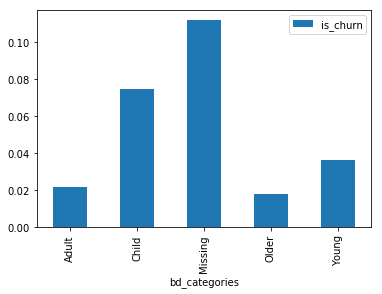

In [38]:
import matplotlib.pyplot as plt
age_pivot = train_tran1.pivot_table(index="bd_categories", values="is_churn")
age_pivot.plot.bar()
plt.show()

In [23]:
from sklearn.metrics import log_loss
print(log_loss(test['is_churn'],test_predictions))
print(log_loss(train['is_churn'], train_predictions))

0.404103725733
0.407898237636


In [25]:
#test_predictionsx.to_csv("test_predictions.csv")
test_predictionsx.columns
#test_predictionsx = test_predictionsx.drop(['Unnamed: 0', 'Unnamed: 0.1','Log_classweight_balanced'], axis = 1)

AttributeError: 'Series' object has no attribute 'columns'

In [7]:
import pandas as pd 
#test_predictionsx = pd.read_csv("test_predictions.csv")
test_predictions10 = pd.read_csv("First model WSDM_SVM_locally.csv")
test_predictions10 = test_predictions10['is_churn']

In [51]:
test_predictionsx["xgb_eta.02_dep5"] = test_predictionsx['1']
test_predictionsx["xgb_eta.02_dep6"] = test_predictionsx['2']
test_predictionsx["xgb_eta.02_dep7"] = test_predictionsx['3']
test_predictionsx["xgb_eta.002_dep5"] = test_predictionsx['4']
test_predictionsx["xgb_eta.002_dep6"] = test_predictionsx['5']
test_predictionsx["xgb_eta.002_dep7"] = test_predictionsx['6']
test_predictionsx["xgb_eta.002_dep8"] = test_predictionsx['7']
test_predictionsx["xgb_eta.02_dep5_pay"] = test_predictionsx['8']
test_predictionsx["two_boosted_trees"] = test_predictionsx['9']
test_predictionsx["neural_network"] = test_predictionsx['10']
test_predictionsx["svm"] = test_predictionsx['11']
test_predictionsx["Log"] = test_predictionsx['12']
test_predictionsx["RFM"] = test_predictionsx['13']
test_predictionsx["Bagging"] = test_predictionsx['14']
test_predictionsx["Adaboost"] = test_predictionsx["15"]
test_predictionsx["SVM_para"] = test_predictionsx["16"]




In [59]:
test_predictions = test_predictionsx.mean(axis=1)

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [6]:
df_x = train_tran1[predictors]
df_y = train_tran1['is_churn']

In [7]:
x_train,x_test,y_train, y_test = train_test_split(df_x,df_y, test_size=0.3, random_state= 4)

In [8]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [9]:
dt.score(x_test,y_test)

0.93348507319216723

In [11]:
train_tran1["dec_sci_col"] = dt.predict_proba(train_tran1[predictors])[:,1]
test_tran1["dec_sci_col"] = dt.predict_proba(test_tran1[predictors])[:,1]

In [16]:
rf = RandomForestClassifier(n_estimators=10)
#rf.fit(x_train, y_train)
rf.fit(train_data[predictors], train_data['is_churn'])
#train_predictions = rf.predict_proba(train[predictors])[:,1]
test_predictions = rf.predict_proba(test_tran1[predictors])[:,1]

In [18]:
#rf.score(x_test,y_test)
len(test_predictions)

907471

In [12]:
rf.score(x_train,y_train)

0.99636000894549137

In [13]:
train_tran1["rand_sci_col"] = rf.predict_proba(train_tran1[predictors])[:,1]
test_tran1["rand_sci_col"] = rf.predict_proba(test_tran1[predictors])[:,1]

In [27]:
bg = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=1.0, n_estimators =20)
bg.fit(train_data[predictors], train_data['is_churn'])
test_predictions = bg.predict_proba(test_tran1[predictors])[:,1]

In [17]:
bg.score(x_test, y_test)

0.95566587020405924

In [15]:
train_tran1["bag_sci_col"] = bg.predict_proba(train_tran1[predictors])[:,1]
test_tran1["bag_sci_col"] = bg.predict_proba(test_tran1[predictors])[:,1]

In [39]:
adb = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators = 10, learning_rate = 0.001)
adb.fit(train_data[predictors], train_data['is_churn'])
test_predictions1 = adb.predict_proba(test_tran1[predictors])[:,1]

In [26]:
adb.score(x_test, y_test)

0.93526681497349706

In [16]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC(kernel = 'poly', degree = 2)

In [9]:
evc = VotingClassifier(estimators=[('lr', lr), ('dt', dt), ('svm', svm)], voting = 'hard')

In [ ]:
evc.fit(x_train.iloc[1:1000], y_train[1:1000])

In [17]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
lr.score(x_test, y_test)

0.91027436763615388

In [25]:
lr.score(x_train, y_train)

0.90996539507291752

In [18]:
train_tran1["lr_sci_col"] = lr.predict_proba(train_tran1[predictors])[:,1]
test_tran1["lr_sci_col"] = lr.predict_proba(test_tran1[predictors])[:,1]

In [26]:
test_predictions = (test_tran1["bag_sci_col"] + test_tran1["rand_sci_col"]+ test_tran1["lr_sci_col"] + test_predictions + test_tran1["dec_sci_col"])/5